# Scrapping Analysis Job from A Job Posting Website

### Importing Necessary Libraries

In [1]:
import time
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

### Extgract data from the specified website

In [2]:
# Create an empty list to store the data
data = []

url = "https://www.myjobmag.co.ke/"
target_page = 1  # Specify the page number you want to scrape

# Specify the keywords to search for in job titles
keywords = ['data', 'credit', 'analysis', 'analytics', 'analyst', 'business intelligence',
            'data science', 'data engineer', 'data visualization', 'data management',
            'financial', 'market', 'risk', 'operations', 'performance', 'investment',
            'research', 'quantitative', 'statistical', 'machine learning', 'data modeling',
            'data mining', 'predictive modeling', 'dashboard', 'reporting', 'data-driven decision making',
            'data cleansing', 'data interpretation', 'data architecture', 'data governance', 'data quality',
            'data strategy', 'data warehouse', 'exploratory data analysis', 'hypothesis testing',
            'root cause analysis', 'time series analysis']


# Send a GET request to the URL
response = requests.get(url)

# Create a BeautifulSoup object with the response text
soup = BeautifulSoup(response.text, "html.parser")

# Find all <li> elements with the class "job-list-li"
job_list_items = soup.find_all("li", class_="job-list-li")

# Iterate over each job listing item
for item in job_list_items:
    # Extract the company name and job details
    company_name_tag = item.find("a", href=True)
    if company_name_tag and company_name_tag.img:
        company_name = company_name_tag.img.get("alt")
    else:
        company_name = "N/A"

    job_title_tag = item.find("h2")
    job_title = job_title_tag.text.strip() if job_title_tag else "N/A"

    # Remove specific word and everything after it from job title
    if " at " in job_title:
        job_title = job_title.split(" at ")[0].strip()

    job_description_tag = item.find("li", class_="job-desc")
    job_description = job_description_tag.text.strip() if job_description_tag else "N/A"

    job_date_tag = item.find("li", id="job-date")
    job_date = job_date_tag.text.strip() if job_date_tag else "N/A"

    # Check if any of the keywords exist in the job title
    if any(keyword in job_title.lower() for keyword in keywords):
        # Check if the job link is present
        job_link = item.find("a", href=True)
        if job_link:
            job_url = urljoin(url, job_link["href"])
            # Send a GET request to the job page
            job_response = requests.get(job_url)
            # Parse the job page HTML content
            job_soup = BeautifulSoup(job_response.content, "html.parser")

            # Extract additional information from the job page
            # Add your code here to extract the required information from the job page

        # Append the extracted data as a dictionary to the list
        data.append({'Company Name': company_name,
                     'Job Title': job_title,
                     'Job Description': job_description,
                     'Job Date': job_date})

        # Print the extracted data
        print("Company Name:", company_name)
        print("Job Title:", job_title)
        print("Job Description:", job_description)
        print("Job Date:", job_date)
        print("-------------------------------------")

# Check for pagination section
pagination_section = soup.find("ul", class_="setPaginate")
if pagination_section:
    current_page_link = pagination_section.find("a", class_="current_page")
    if current_page_link:
        current_page = int(current_page_link.text)
        for page in range(current_page + 1, target_page + 1):
            next_page_link = pagination_section.find("a", href=f"/page/{page}")
            if next_page_link:
                next_url = urljoin(url, next_page_link["href"])
                time.sleep(2)  # Add a delay to be polite to the website
                response = requests.get(next_url)
                soup = BeautifulSoup(response.text, "html.parser")
                job_list_items = soup.find_all("li", class_="job-list-li")
                for item in job_list_items:
                    # Extract and print the data from each job listing item
                    company_name_tag = item.find("a", href=True)
                    if company_name_tag and company_name_tag.img:
                        company_name = company_name_tag.img.get("alt")
                    else:
                        company_name = "N/A"
                    
                    job_title_tag = item.find("h2")
                    job_title = job_title_tag.text.strip() if job_title_tag else "N/A"
                    
                    # Remove specific word and everything after it from job title
                    if " at " in job_title:
                        job_title = job_title.split(" at ")[0].strip()
                    
                    job_description_tag = item.find("li", class_="job-desc")
                    job_description = job_description_tag.text.strip() if job_description_tag else "N/A"
                    
                    job_date_tag = item.find("li", id="job-date")
                    job_date = job_date_tag.text.strip() if job_date_tag else "N/A"

                    # Check if any of the keywords exist in the job title
                    if any(keyword in job_title.lower() for keyword in keywords):
                        # Check if the job link is present
                        job_link = item.find("a", href=True)
                        if job_link:
                            job_url = urljoin(url, job_link["href"])
                            # Send a GET request to the job page
                            job_response = requests.get(job_url)
                            # Parse the job page HTML content
                            job_soup = BeautifulSoup(job_response.content, "html.parser")

                            # Extract additional information from the job page
                            # Add your code here to extract the required information from the job page

                        # Append the extracted data as a dictionary to the list
                        data.append({'Scraping data from page': page,
                                     'Company Name': company_name,
                                     'Job Title': job_title,
                                     'Job Description': job_description,
                                     'Job Date': job_date})

                        # Print the extracted data
                        print("Scraping data from page", page)
                        print("Company Name:", company_name)
                        print("Job Title:", job_title)
                        print("Job Description:", job_description)
                        print("Job Date:", job_date)
                        print("-------------------------------------")

                # Update the pagination section
                pagination_section = soup.find("ul", class_="setPaginate")

            else:
                break
else:
    print("No pagination section found on the page.")



Company Name: People FOCO
Job Title: Sales & Marketing Executive
Job Description: We are a HR Consultancy firm that is very passionate about people and their contribution towards the growth and success of any organization. We create systems that are streamlined towards the attainme...
Job Date: 08 June
-------------------------------------
Company Name: I&M Bank
Job Title: Quality Analyst-Digital Lending
Job Description: I&M Bank is a wholly owned subsidiary of I&M Holdings Limited, a publicly quoted company at the Nairobi Securities Exchange (NSE). The bank possesses a rich heritage in banking.
Job Date: 12 June
-------------------------------------


### Convert the data list to a Pandas DataFrame

In [3]:
# Convert the data list to a Pandas DataFrame
df = pd.DataFrame(data)

### Save the DataFrame to a CSV file

In [4]:
# Save the DataFrame to a CSV file
df.to_csv('Data/analyst_job_data.csv', index=False)


# Data Visualization

### Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

### Import the saved CSV file for analysis

In [2]:
# Read the CSV file
df = pd.read_csv('Data/analyst_job_data.csv')

### Count and Display Top 20 Job Titles

In [3]:
# Get the count of job titles
job_title_counts = df['Job Title'].value_counts().head(20).reset_index()

# Rename the columns
job_title_counts.columns = ['Job Title', 'Count']

# Display the table
print(tabulate(job_title_counts, headers='keys', tablefmt='fancy_grid', colalign=("left", "center"), showindex=False, numalign="center"))


╒═════════════════════════╤═════════╕
│ Job Title               │  Count  │
╞═════════════════════════╪═════════╡
│ Marketing Manager       │   27    │
├─────────────────────────┼─────────┤
│ Data Analyst            │   23    │
├─────────────────────────┼─────────┤
│ Operations Manager      │   20    │
├─────────────────────────┼─────────┤
│ Business Analyst        │   16    │
├─────────────────────────┼─────────┤
│ Financial Controller    │   13    │
├─────────────────────────┼─────────┤
│ Database Administrator  │   13    │
├─────────────────────────┼─────────┤
│ Data Engineer           │   12    │
├─────────────────────────┼─────────┤
│ Marketing Officer       │   12    │
├─────────────────────────┼─────────┤
│ Marketing Executive     │   12    │
├─────────────────────────┼─────────┤
│ Research Manager        │   10    │
├─────────────────────────┼─────────┤
│ Financial Accountant    │   10    │
├─────────────────────────┼─────────┤
│ Data Scientist          │   10    │
├───────────

### Count and Display Job Titles for Top 20 Companies

In [4]:
# Get the count of job titles
job_title_counts = df['Company Name'].value_counts().head(25).reset_index()

# Rename the columns
job_title_counts.columns = ['Company Name', 'Count']

# Display the table
print(tabulate(job_title_counts, headers='keys', tablefmt='fancy_grid', colalign=("left", "center"), showindex=False, numalign="center"))


╒═══════════════════════════════════════════════════╤═════════╕
│ Company Name                                      │  Count  │
╞═══════════════════════════════════════════════════╪═════════╡
│ Safaricom Kenya                                   │   34    │
├───────────────────────────────────────────────────┼─────────┤
│ Standard Chartered Bank Kenya                     │   32    │
├───────────────────────────────────────────────────┼─────────┤
│ Citi                                              │   29    │
├───────────────────────────────────────────────────┼─────────┤
│ KEMRI Wellcome Trust Research Programme (KWTRP)   │   29    │
├───────────────────────────────────────────────────┼─────────┤
│ Equity Bank Kenya                                 │   27    │
├───────────────────────────────────────────────────┼─────────┤
│ International Rescue Committee                    │   26    │
├───────────────────────────────────────────────────┼─────────┤
│ World Bank Group                      

### Visualize Top 20 Companies Hiring for Analyst Positions

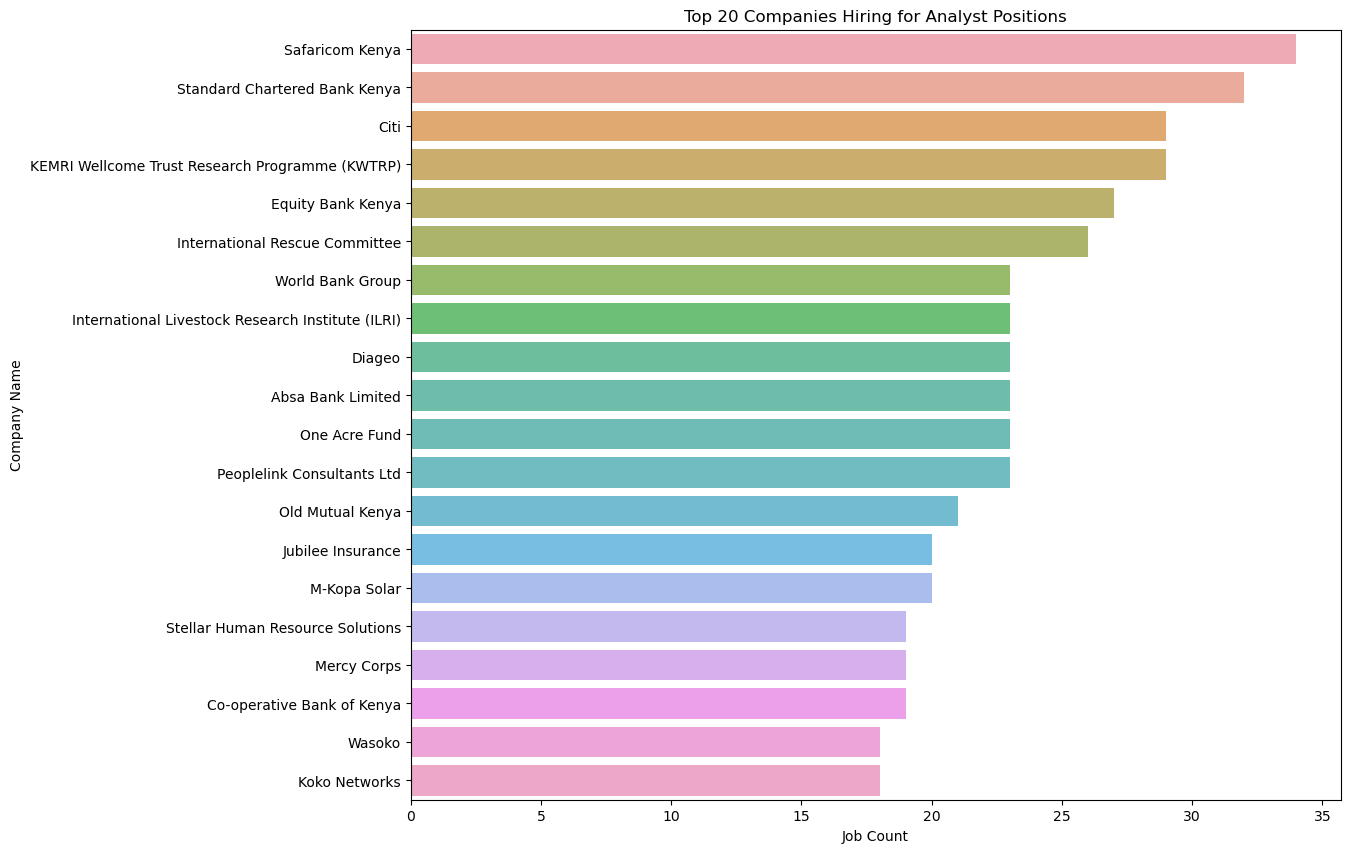

In [5]:
# Filter out rows with "N/A" values in the 'Company Name' column
df_filtered = df[df['Company Name'] != 'N/A']

# Perform word count on the company names
company_name_counts = df_filtered['Company Name'].value_counts().head(20)

# Plot the top 20 company names
plt.figure(figsize=(12, 10))
sns.barplot(x=company_name_counts.values, y=company_name_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring for Analyst Positions')
plt.ylabel('Company Name')
plt.xlabel('Job Count')
plt.show()


### Visualize Top 20 Most Hired Jobs in Analytics Positions

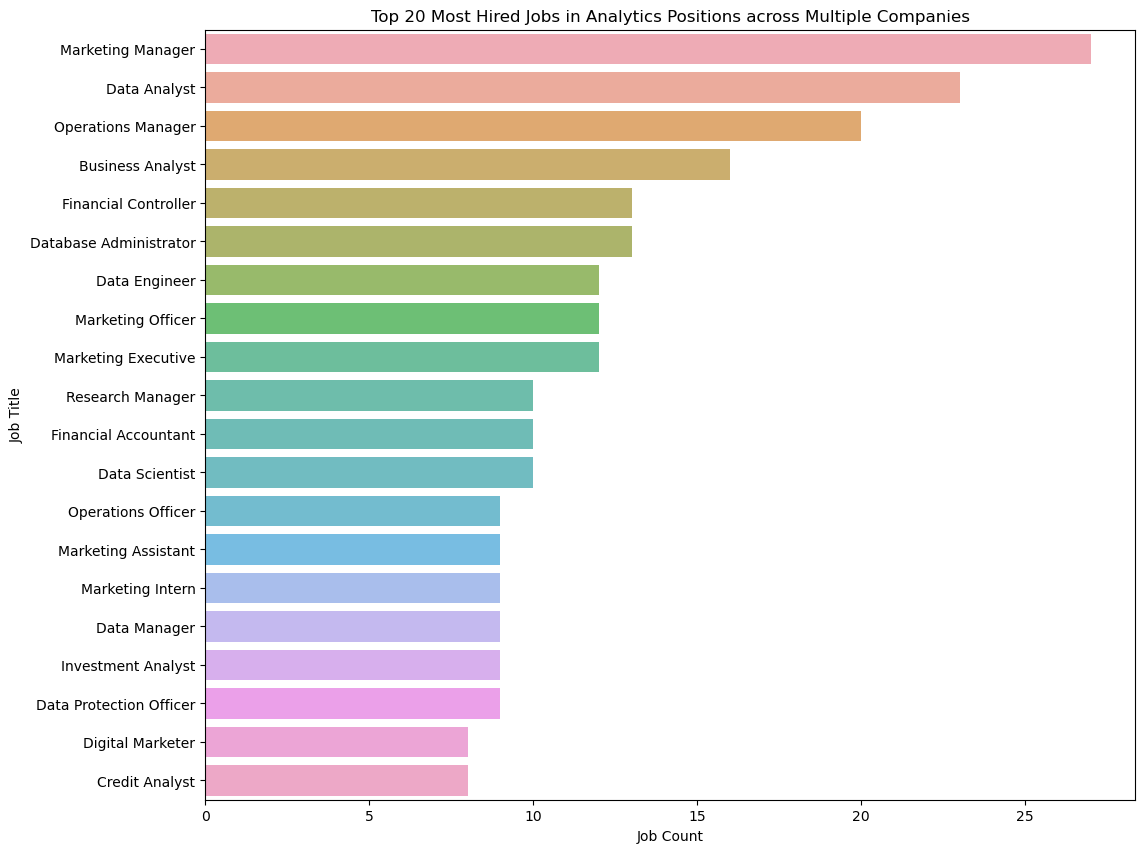

In [6]:
# Filter out rows with "N/A" values in the 'Job Title' column
df_filtered = df[df['Job Title'] != 'N/A']

# Exclude rows with specific words
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_filtered = df_filtered[~df_filtered['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform word count on the job titles
job_title_counts = df_filtered['Job Title'].value_counts().head(20)

# Plot the top 20 job titles
plt.figure(figsize=(12, 10))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, alpha=0.8)
plt.title('Top 20 Most Hired Jobs in Analytics Positions across Multiple Companies')
plt.xlabel('Job Count')
plt.ylabel('Job Title')
plt.show()


### Top 20 Companies Hiring Marketing Managers

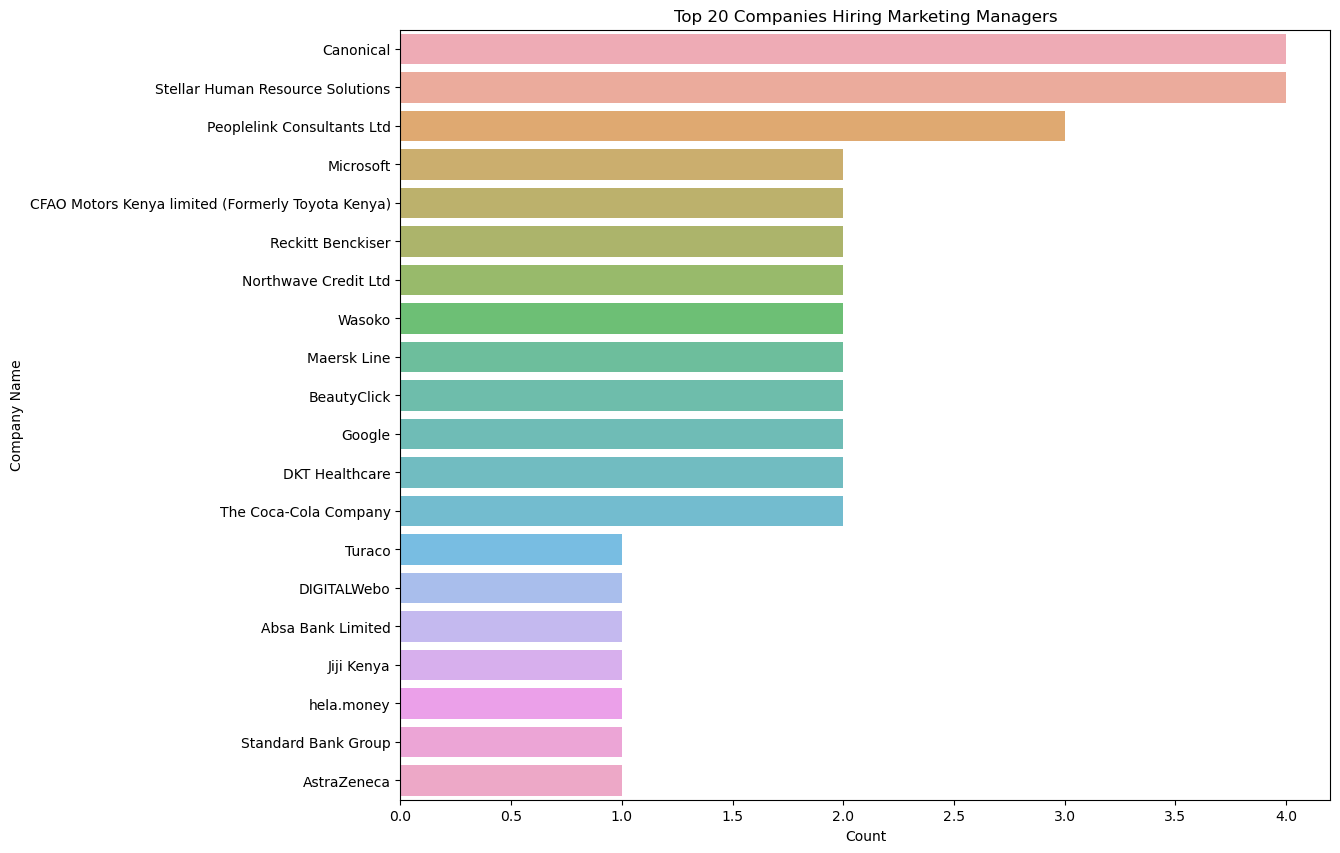

In [7]:
# Filter the rows for Marketing Manager jobs
df_marketing_manager = df_filtered[df_filtered['Job Title'].str.contains('Marketing Manager', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_marketing_manager = df_marketing_manager[~df_marketing_manager['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Marketing Managers
company_counts = df_marketing_manager['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Marketing Managers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Data Analysts

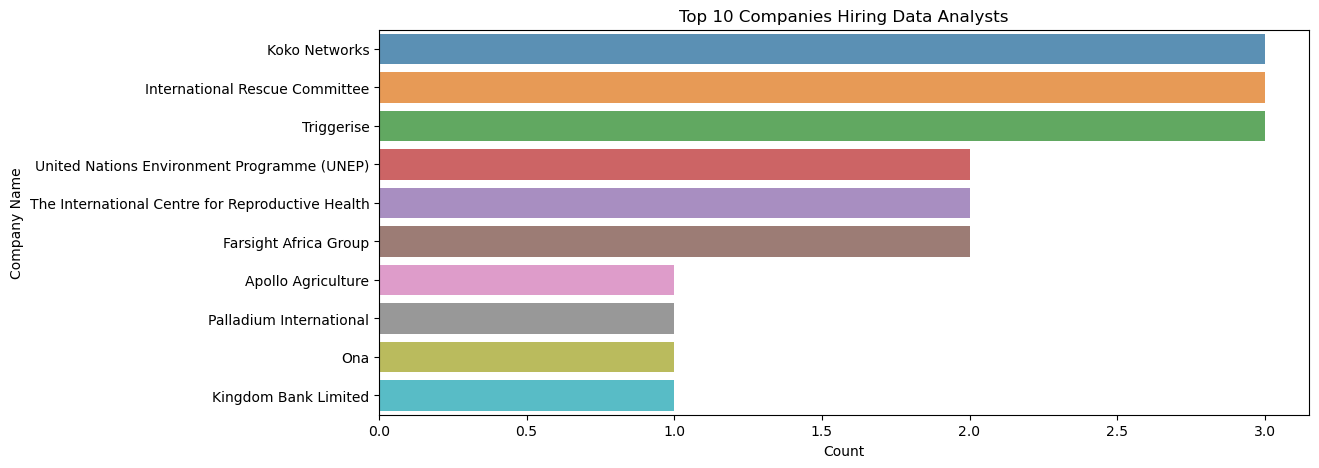

In [8]:
# Filter the rows for Data Analyst jobs
df_data_analyst = df_filtered[df_filtered['Job Title'].str.contains('Data Analyst', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_data_analyst = df_data_analyst[~df_data_analyst['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for data analysts
company_counts = df_data_analyst['Company Name'].value_counts().head(10)

# Plot the top 10 hiring companies
plt.figure(figsize=(12, 5))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 10 Companies Hiring Data Analysts')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Operations Managers

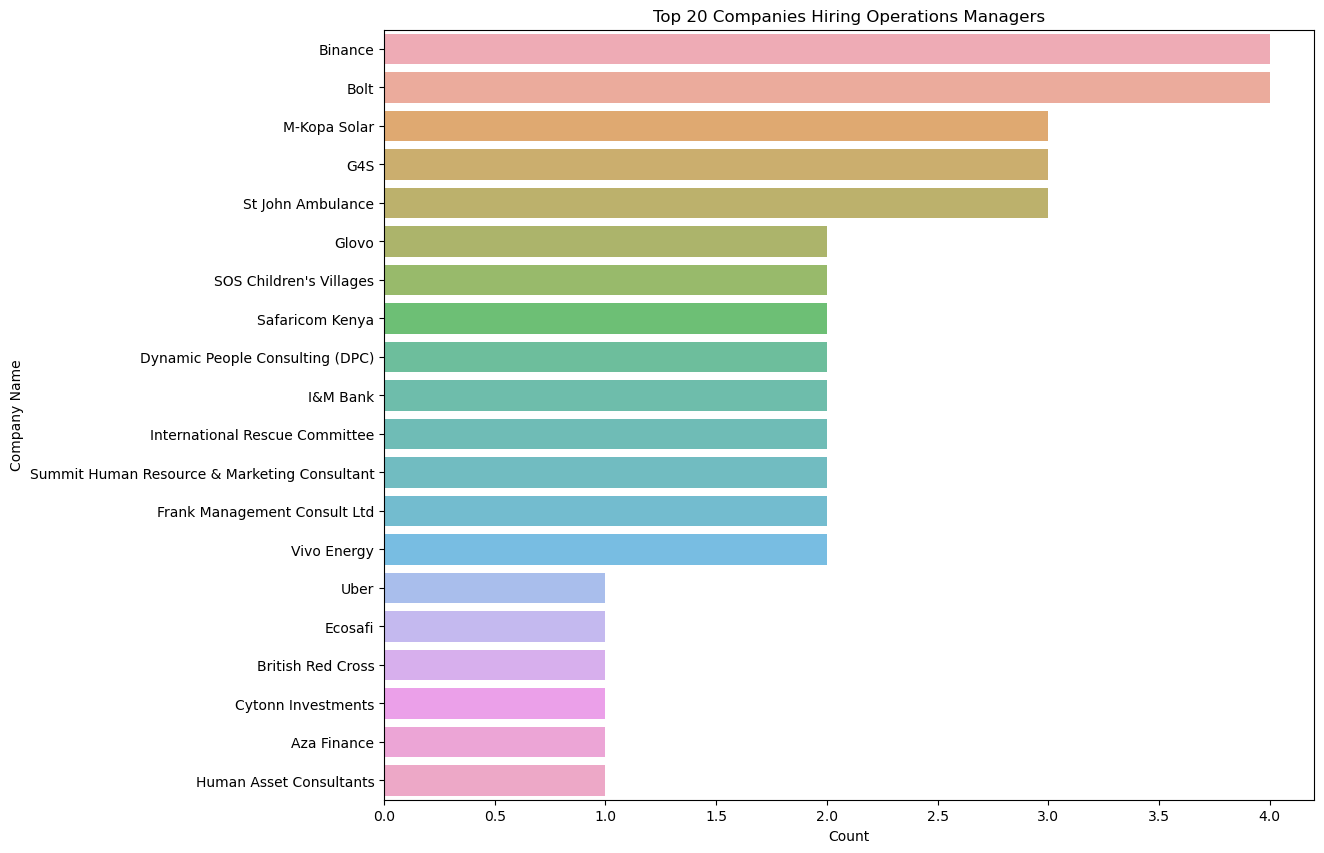

In [9]:
# Filter the rows for Operations Manager jobs
df_operations_manager = df_filtered[df_filtered['Job Title'].str.contains('Operations Manager', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_operations_manager = df_operations_manager[~df_operations_manager['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Operations Managers
company_counts = df_operations_manager['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Operations Managers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Business Analysts

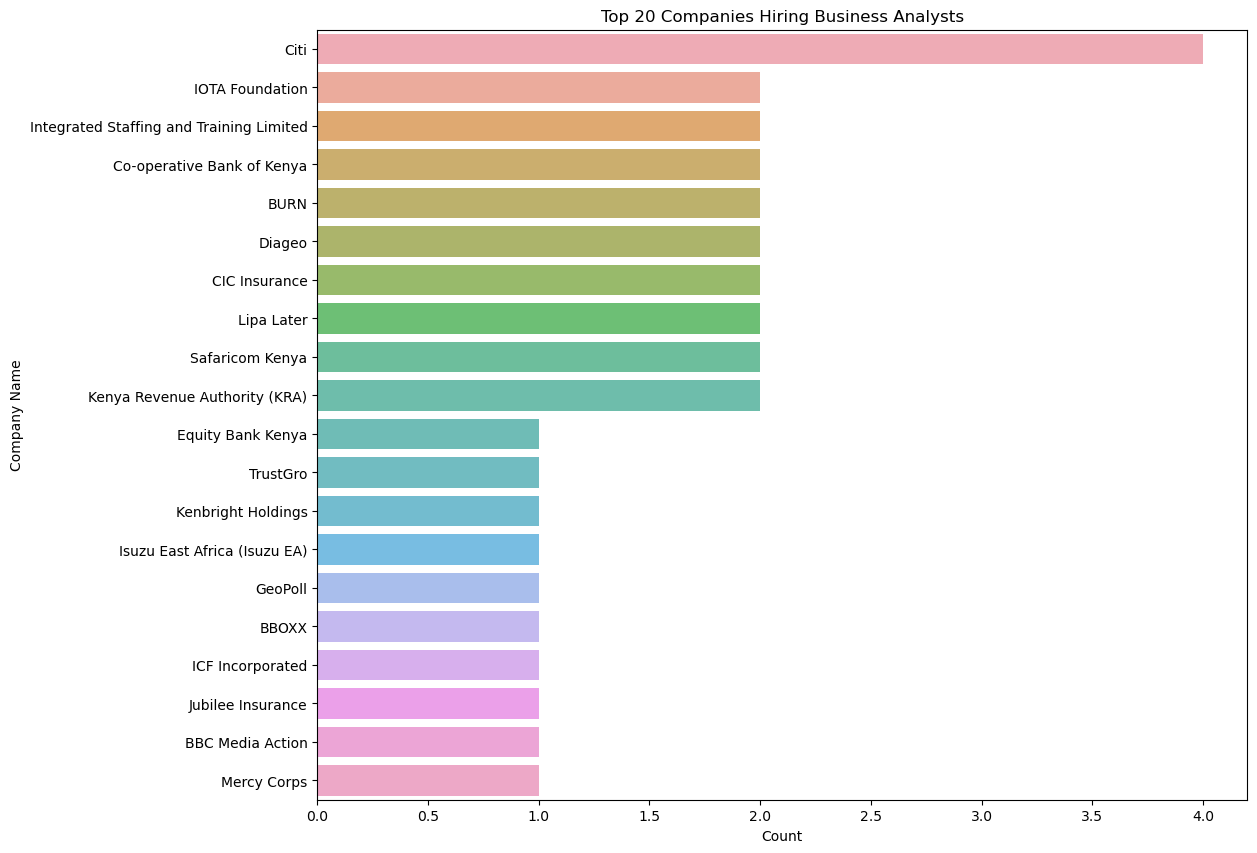

In [10]:
# Filter the rows for Business Analyst jobs
df_business_analyst = df_filtered[df_filtered['Job Title'].str.contains('Business Analyst', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_business_analyst = df_business_analyst[~df_business_analyst['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Business Analysts
company_counts = df_business_analyst['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Business Analysts')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Financial Controllers

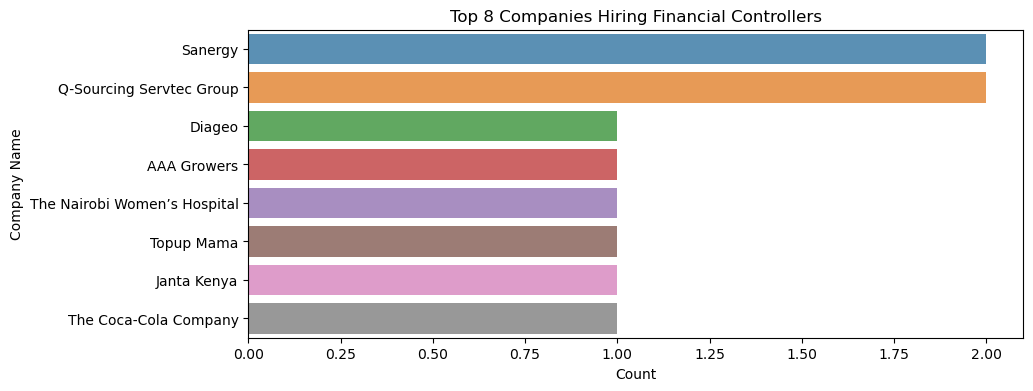

In [11]:
# Filter the rows for Financial Controller jobs
df_financial_controller = df_filtered[df_filtered['Job Title'].str.contains('Financial Controller', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_financial_controller = df_financial_controller[~df_financial_controller['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Financial Controllers
company_counts = df_financial_controller['Company Name'].value_counts().head(8)

# Plot the top 8 hiring companies
plt.figure(figsize=(10, 4))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 8 Companies Hiring Financial Controllers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Database Administrators

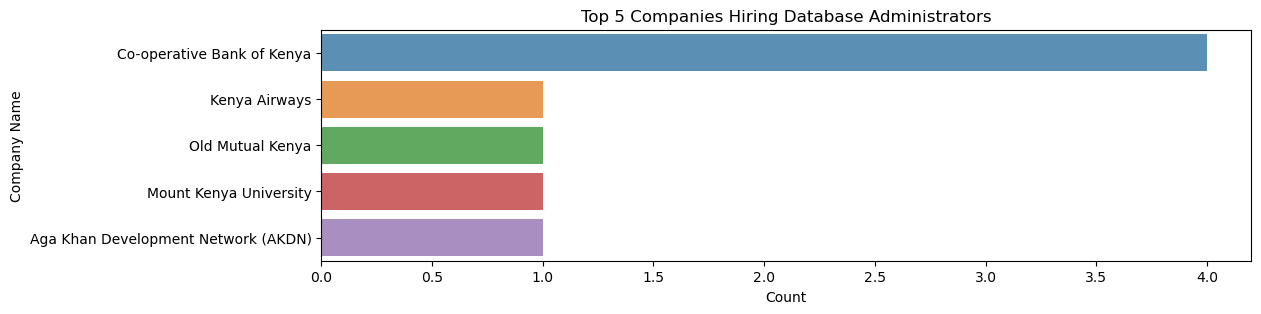

In [12]:
# Filter the rows for Database Administrator jobs
df_db_admin = df_filtered[df_filtered['Job Title'].str.contains('Database Administrator', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_db_admin = df_db_admin[~df_db_admin['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Database Administrators
company_counts = df_db_admin['Company Name'].value_counts().head(5)

# Plot the top 5 hiring companies
plt.figure(figsize=(12, 3))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 5 Companies Hiring Database Administrators')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Data Engineers

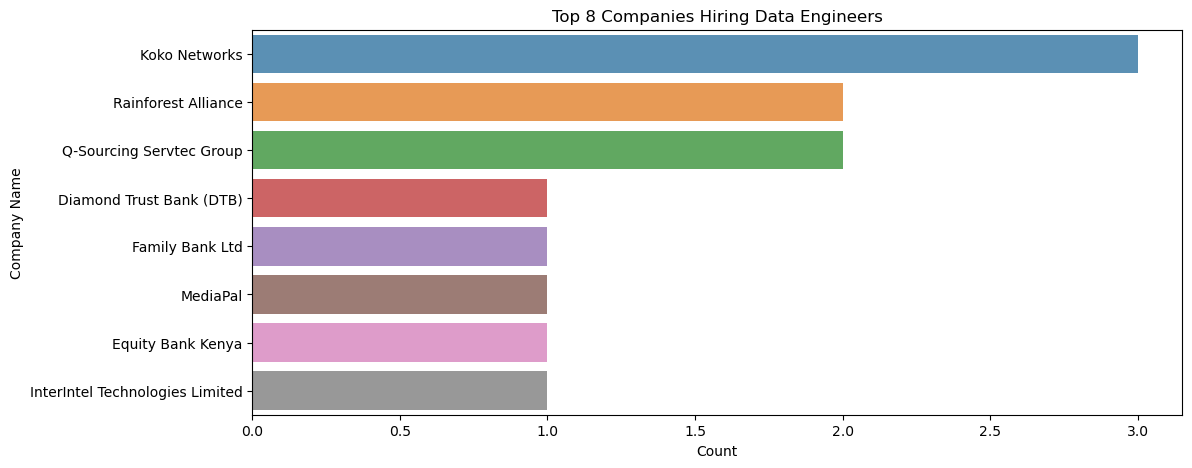

In [13]:
# Filter the rows for Data Engineer jobs
df_data_engineer = df_filtered[df_filtered['Job Title'].str.contains('Data Engineer', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_data_engineer = df_data_engineer[~df_data_engineer['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Data Engineers
company_counts = df_data_engineer['Company Name'].value_counts().head(8)

# Plot the top 8 hiring companies
plt.figure(figsize=(12, 5))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 8 Companies Hiring Data Engineers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 10 Companies Hiring Marketing Officers

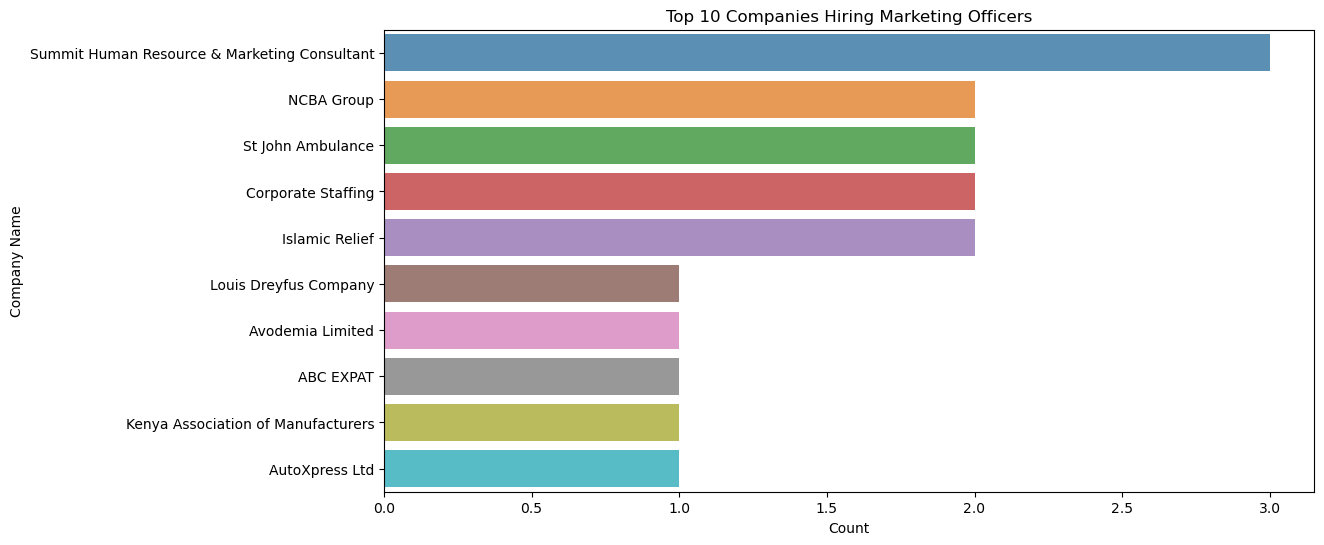

In [14]:
# Filter the rows for Marketing Officer jobs
df_marketing_officer = df_filtered[df_filtered['Job Title'].str.contains('Marketing Officer', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_marketing_officer = df_marketing_officer[~df_marketing_officer['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Marketing Officers
company_counts = df_marketing_officer['Company Name'].value_counts().head(10)

# Plot the top 10 hiring companies for Marketing Officers
plt.figure(figsize=(12, 6))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 10 Companies Hiring Marketing Officers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


In [15]:
### Top 20 Companies Hiring Marketing Executives

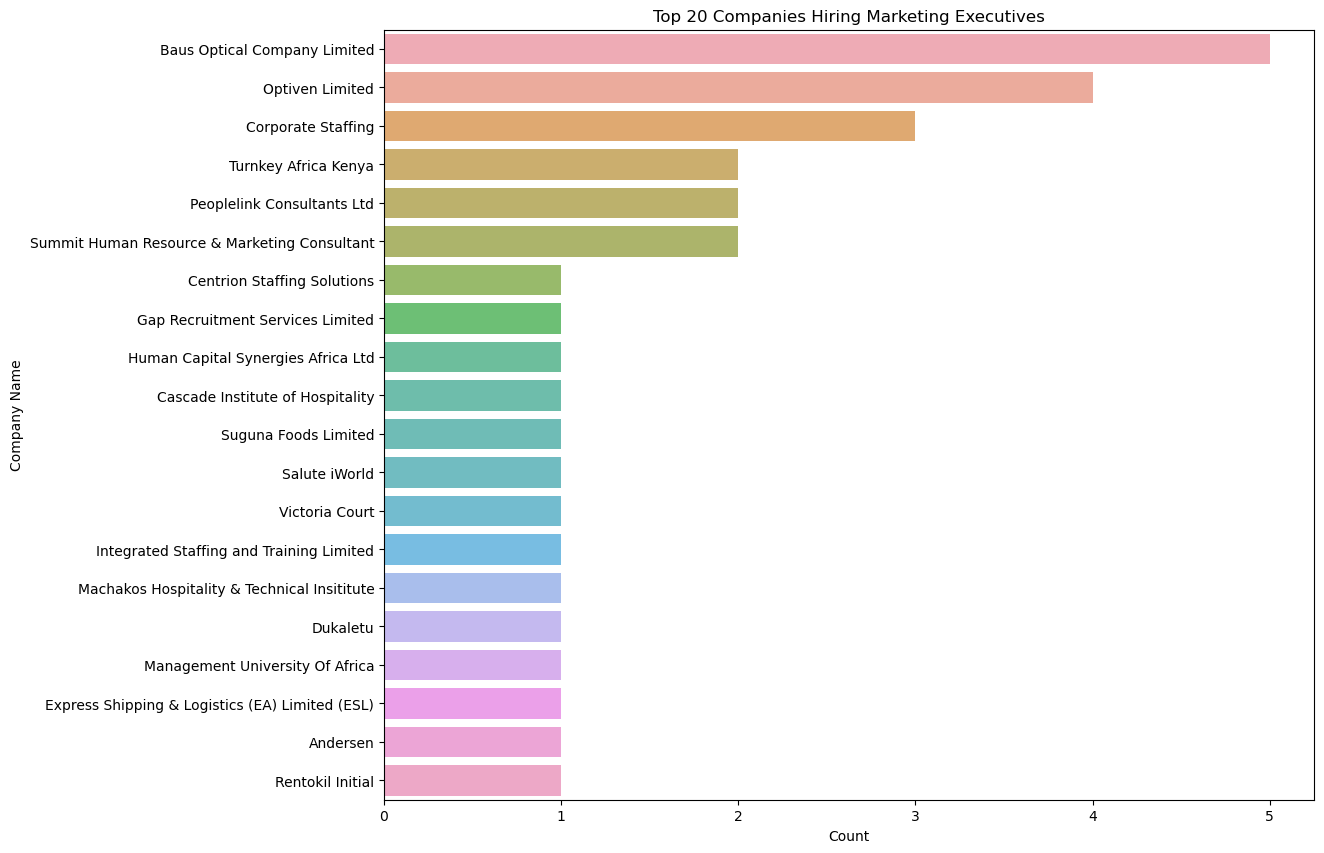

In [16]:
# Filter the rows for Marketing Executive jobs
df_marketing_executive = df_filtered[df_filtered['Job Title'].str.contains('Marketing Executive', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_marketing_executive = df_marketing_executive[~df_marketing_executive['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Marketing Executives
company_counts = df_marketing_executive['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Marketing Executives
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Marketing Executives')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Research Managers

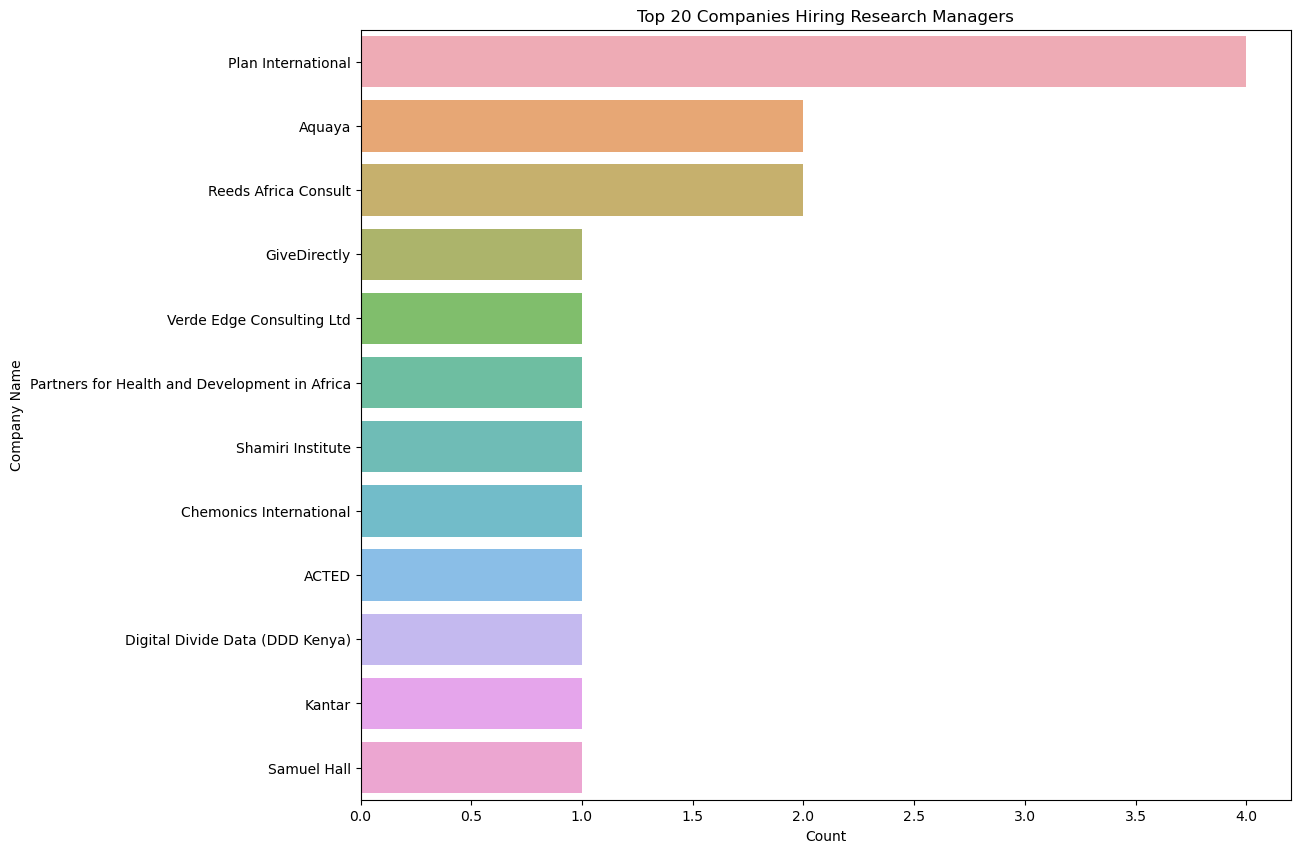

In [17]:
# Filter the rows for Research Manager jobs
df_research_manager = df_filtered[df_filtered['Job Title'].str.contains('Research Manager', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_research_manager = df_research_manager[~df_research_manager['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Research Managers
company_counts = df_research_manager['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Research Managers
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Research Managers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Accountants

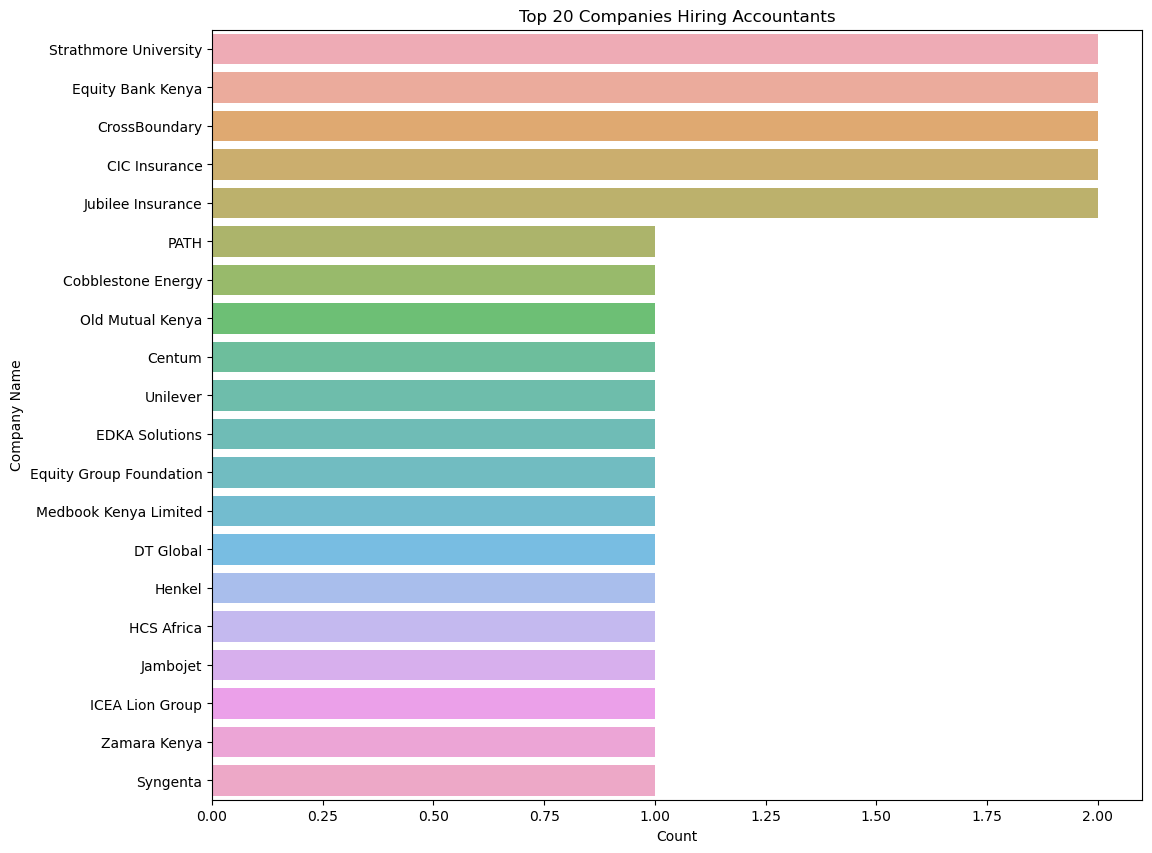

In [18]:
# Filter the rows for Accountant jobs
df_accountant = df_filtered[df_filtered['Job Title'].str.contains('Accountant', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_accountant = df_accountant[~df_accountant['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Accountants
company_counts = df_accountant['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Accountants
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Accountants')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Data Scientists

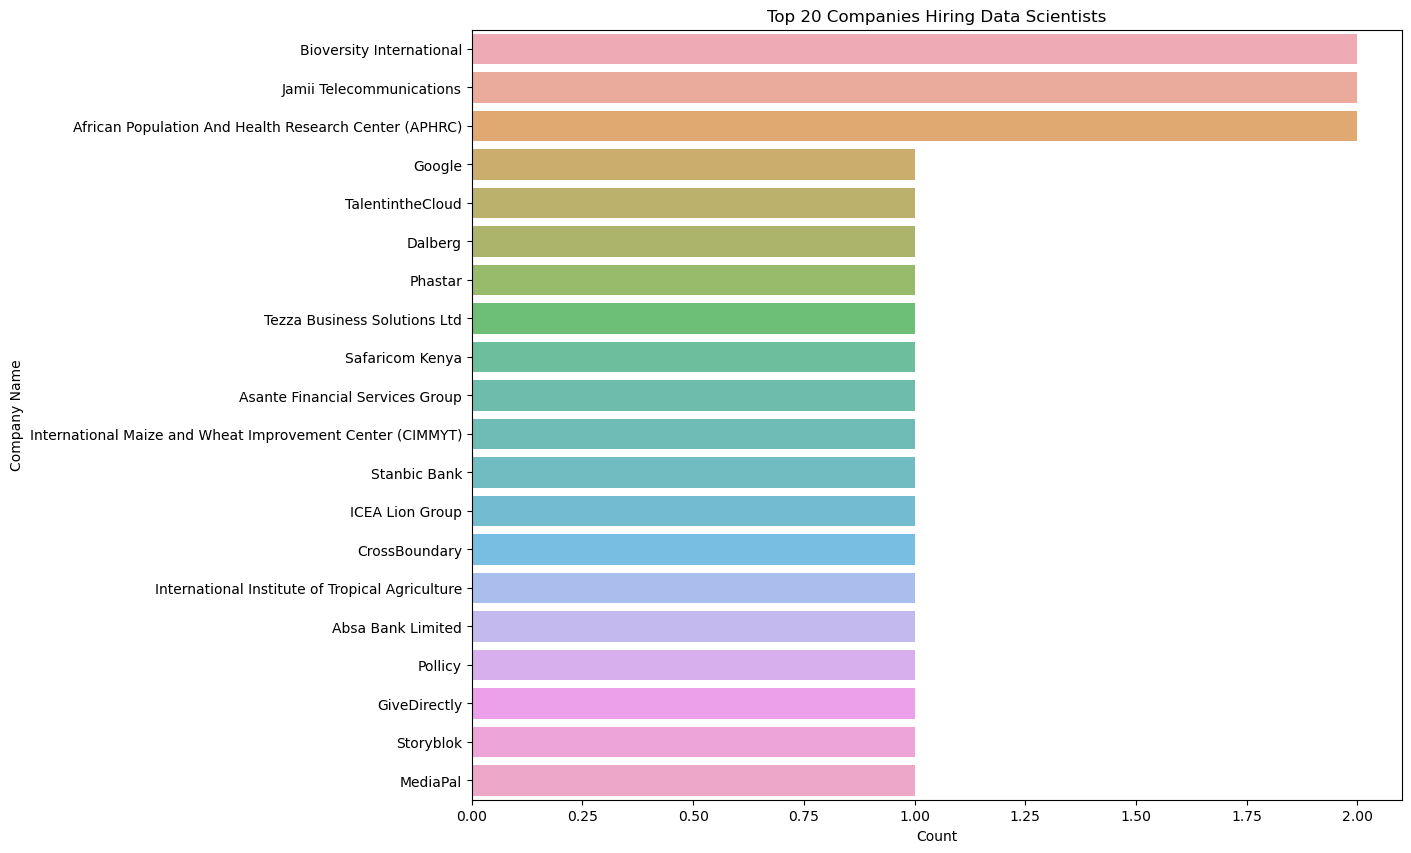

In [19]:
# Filter the rows for Data Scientist jobs
df_data_scientist = df_filtered[df_filtered['Job Title'].str.contains('Data Scientist', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_data_scientist = df_data_scientist[~df_data_scientist['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Data Scientists
company_counts = df_data_scientist['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Data Scientists
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Data Scientists')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Operations Officers

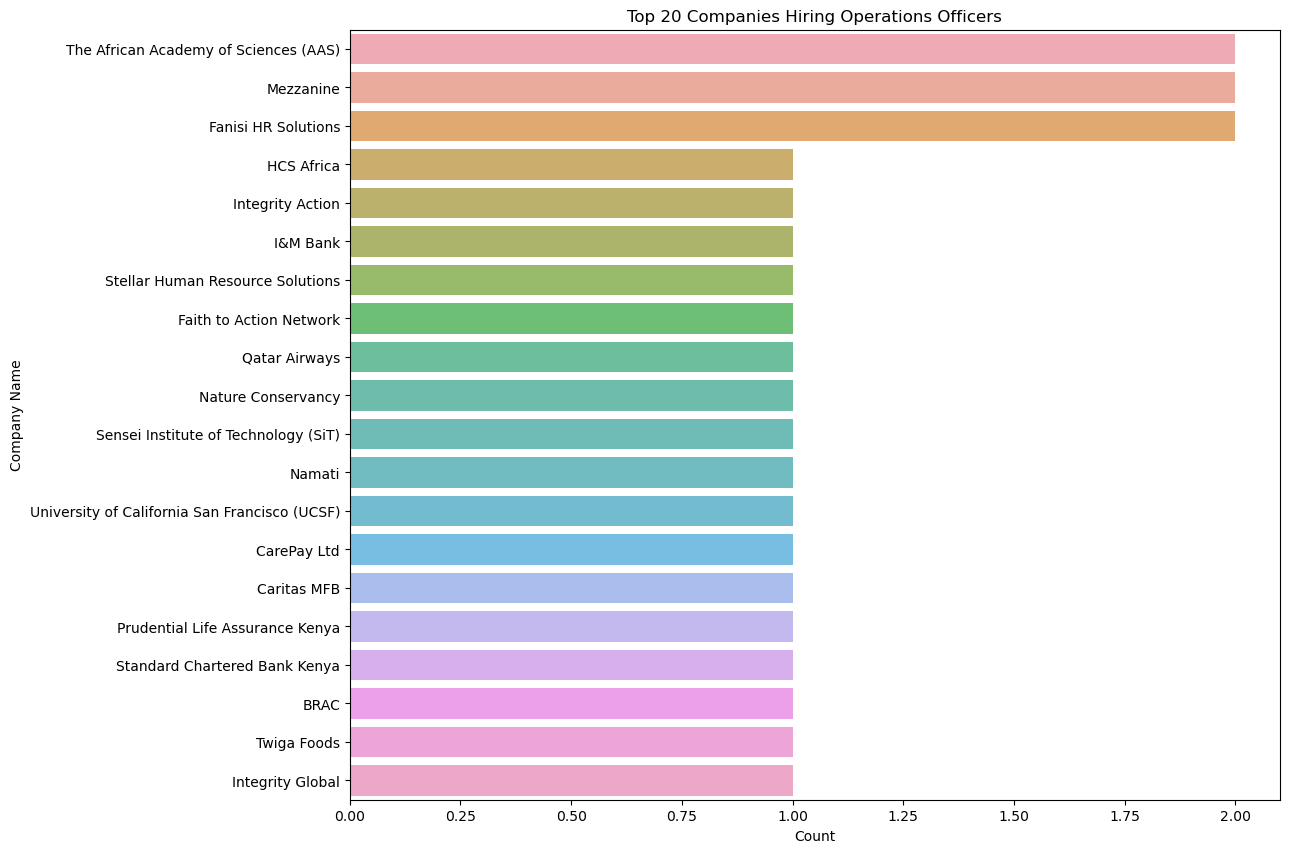

In [20]:
# Filter the rows for Operations Officer jobs
df_operations_officer = df_filtered[df_filtered['Job Title'].str.contains('Operations Officer', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_operations_officer = df_operations_officer[~df_operations_officer['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Operations Officers
company_counts = df_operations_officer['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Operations Officers
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Operations Officers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Marketing Assistants

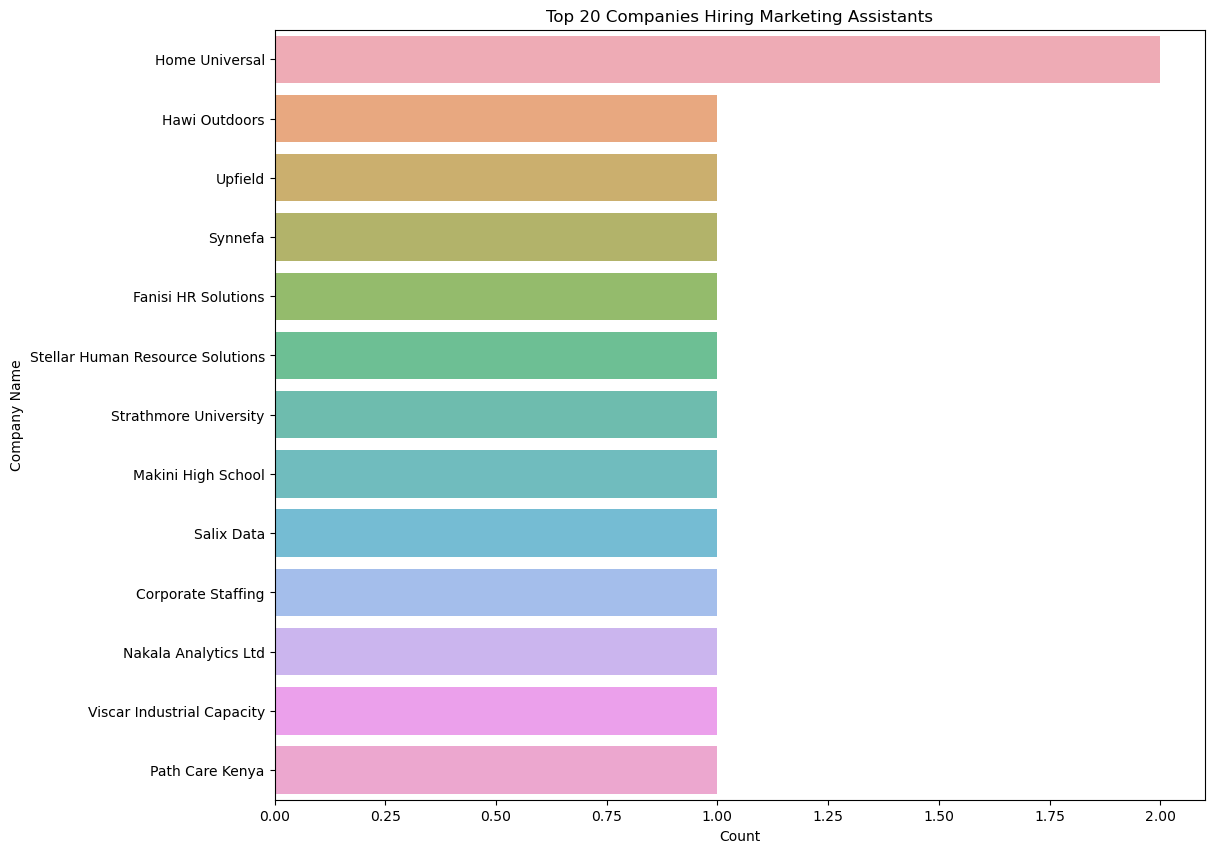

In [21]:
# Filter the rows for Marketing Assistant jobs
df_marketing_assistant = df_filtered[df_filtered['Job Title'].str.contains('Marketing Assistant', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_marketing_assistant = df_marketing_assistant[~df_marketing_assistant['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Marketing Assistants
company_counts = df_marketing_assistant['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Marketing Assistants
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Marketing Assistants')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Marketing Interns

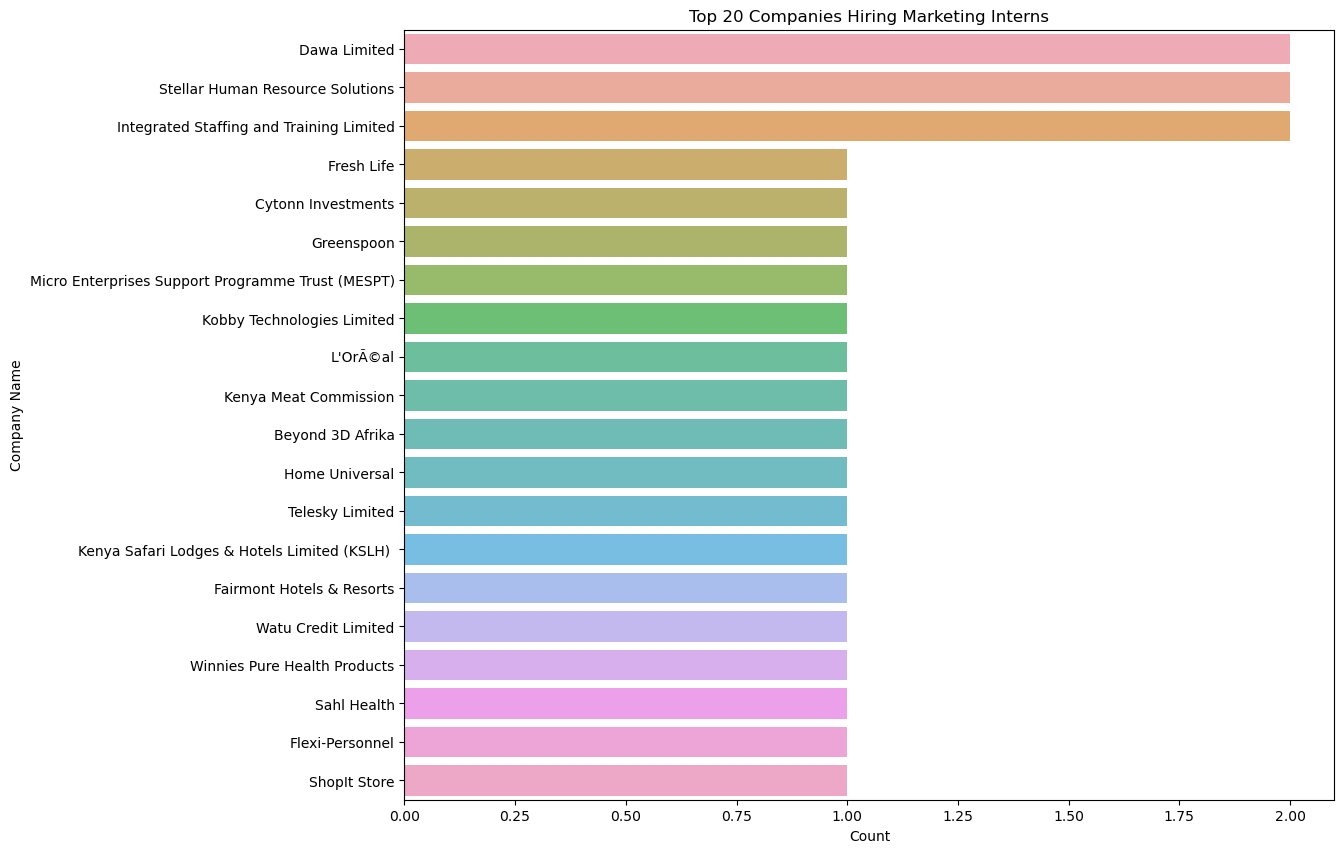

In [22]:
# Filter the rows for Marketing Intern jobs
df_marketing_intern = df_filtered[df_filtered['Job Title'].str.contains('Marketing Intern', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_marketing_intern = df_marketing_intern[~df_marketing_intern['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Marketing Interns
company_counts = df_marketing_intern['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Marketing Interns
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Marketing Interns')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Data Managers

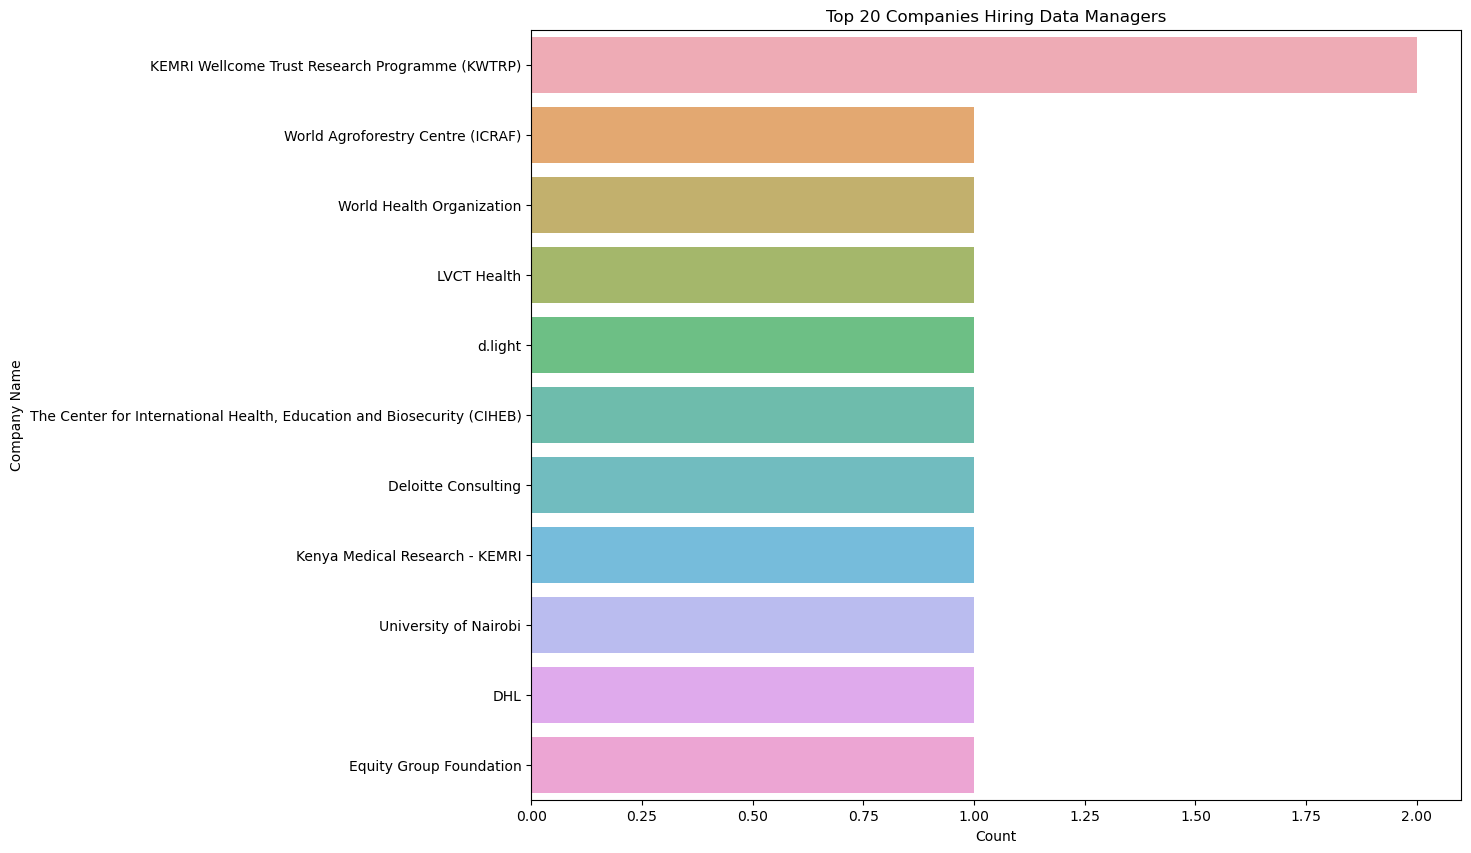

In [23]:
# Filter the rows for Data Manager jobs
df_data_manager = df_filtered[df_filtered['Job Title'].str.contains('Data Manager', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_data_manager = df_data_manager[~df_data_manager['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Data Managers
company_counts = df_data_manager['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Data Managers
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Data Managers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Investment Analysts

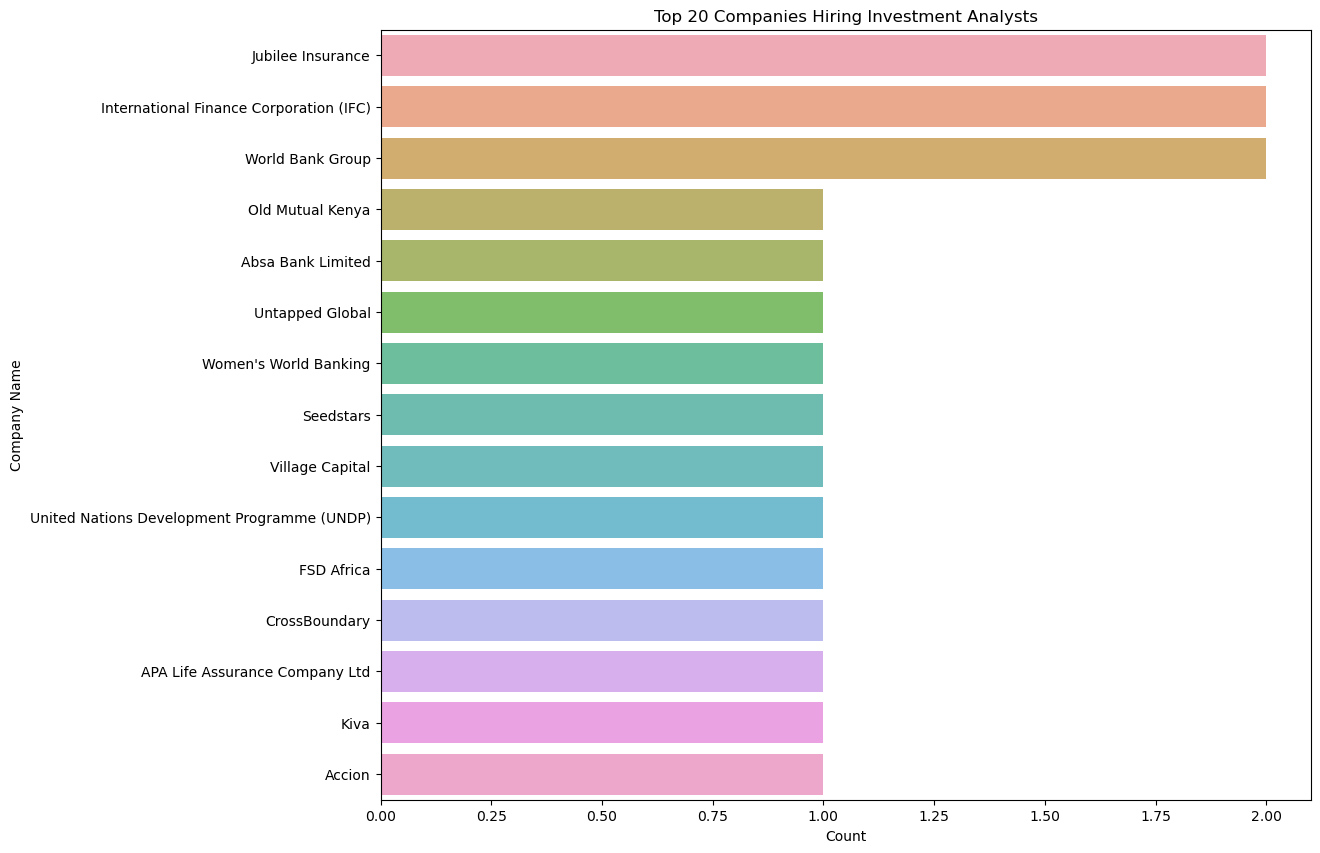

In [24]:
# Filter the rows for Investment Analyst jobs
df_investment_analyst = df_filtered[df_filtered['Job Title'].str.contains('Investment Analyst', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_investment_analyst = df_investment_analyst[~df_investment_analyst['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Investment Analysts
company_counts = df_investment_analyst['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Investment Analysts
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Investment Analysts')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Data Protection Officers

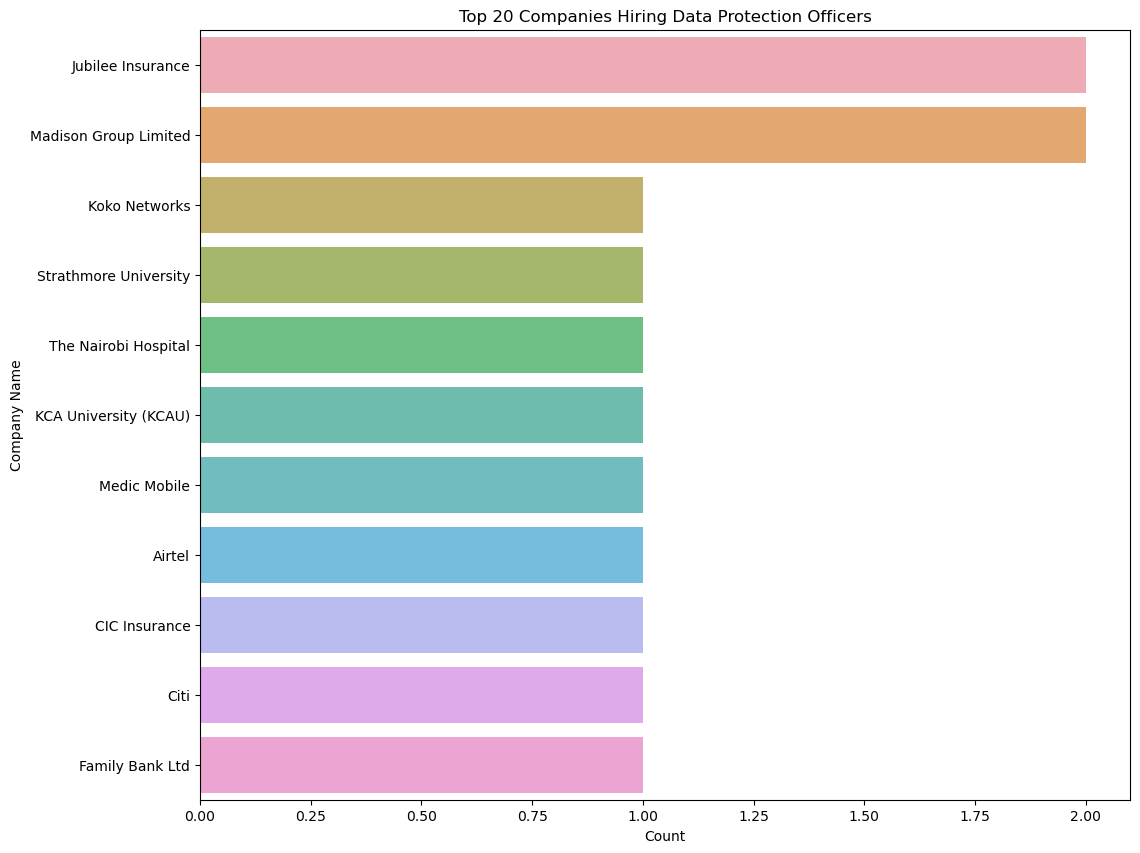

In [25]:
# Filter the rows for Data Protection Officer jobs
df_data_protection_officer = df_filtered[df_filtered['Job Title'].str.contains('Data Protection Officer', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_data_protection_officer = df_data_protection_officer[~df_data_protection_officer['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Data Protection Officers
company_counts = df_data_protection_officer['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Data Protection Officers
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Data Protection Officers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Digital Marketers

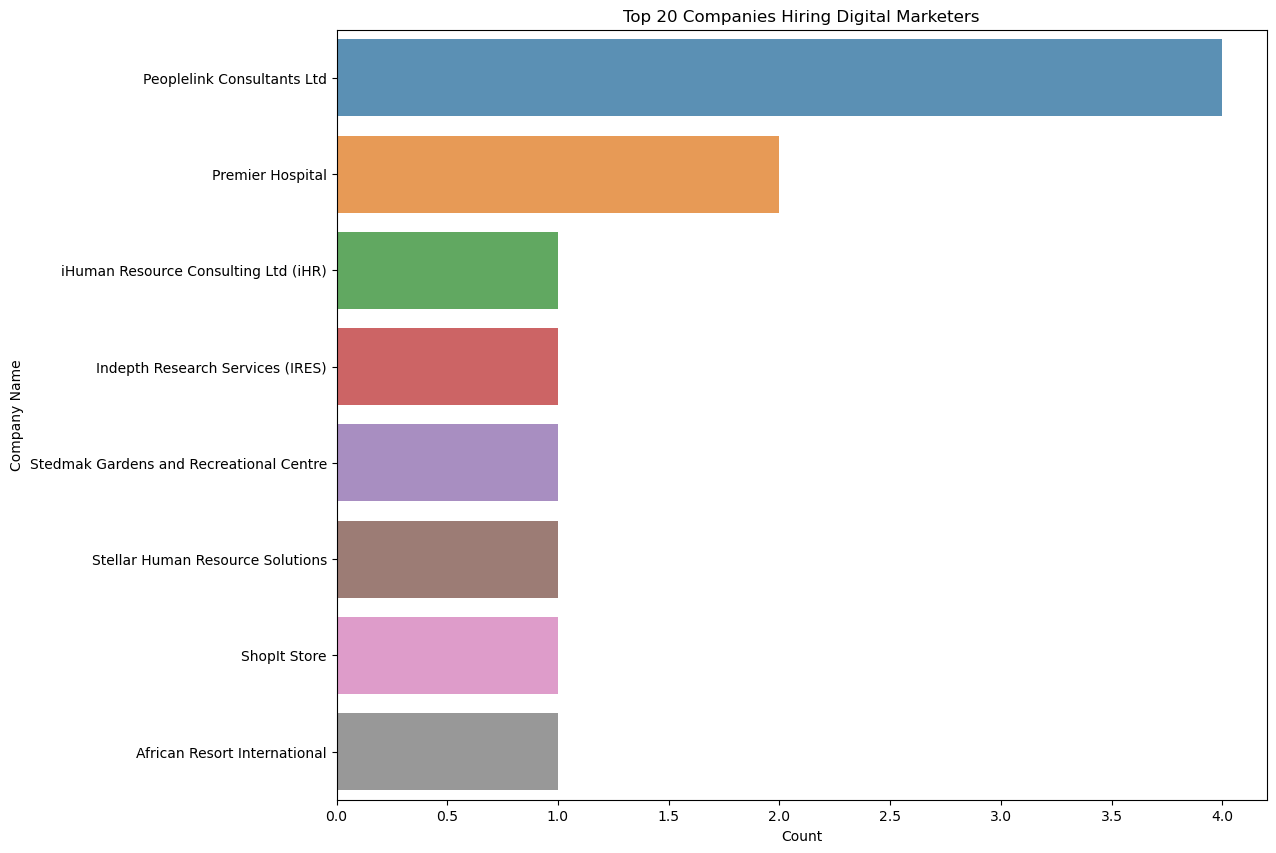

In [26]:
# Filter the rows for Digital Marketer jobs
df_digital_marketer = df_filtered[df_filtered['Job Title'].str.contains('Digital Marketer', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_digital_marketer = df_digital_marketer[~df_digital_marketer['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Digital Marketers
company_counts = df_digital_marketer['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Digital Marketers
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Digital Marketers')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()


### Top 20 Companies Hiring Credit Analysts

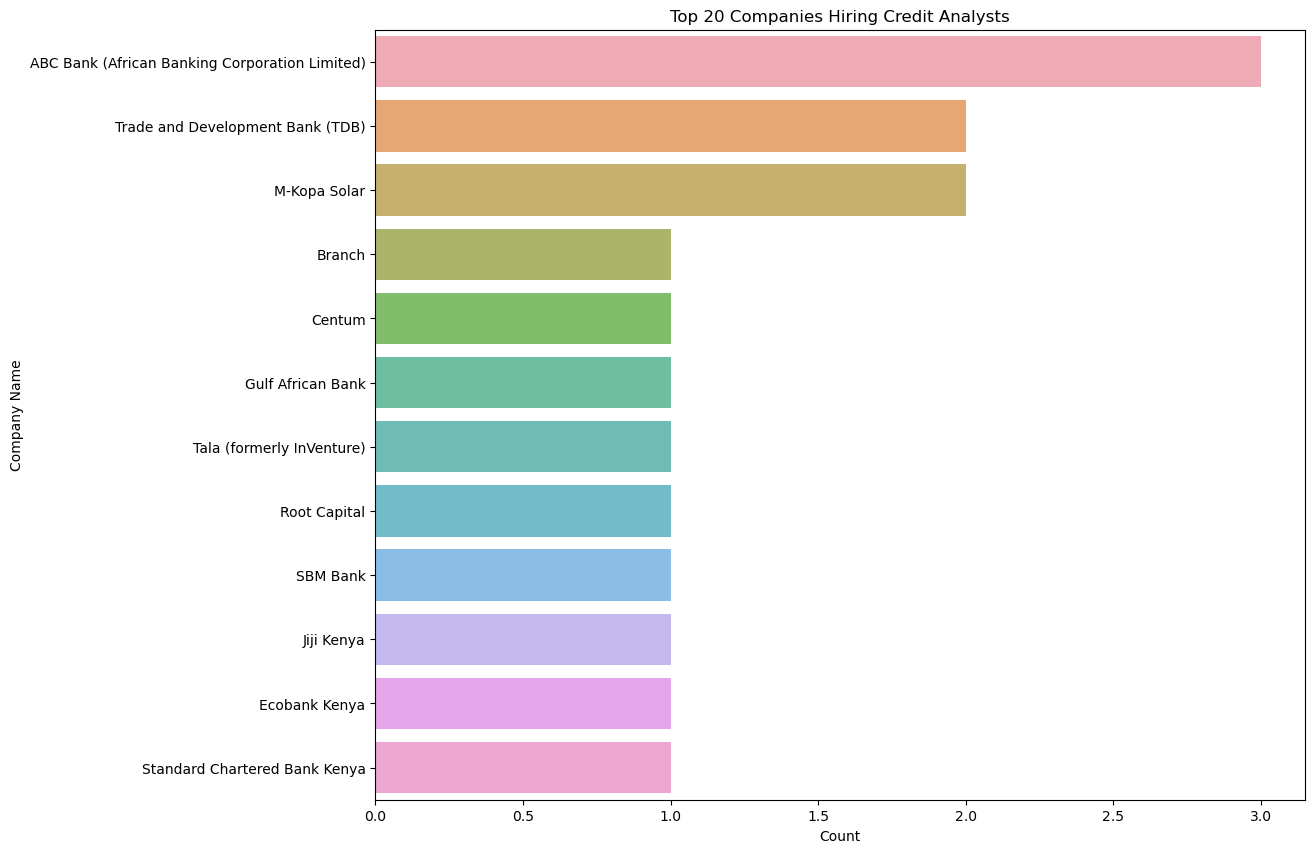

In [27]:
# Filter the rows for Credit Analyst jobs
df_credit_analyst = df_filtered[df_filtered['Job Title'].str.contains('Credit Analyst', case=False)]

# Exclude rows with specific words in the 'Job Title' column
words_to_exclude = ['Vacancies', 'Career Opportunities', 'Jobs', 'Openings', 'Job Openings', 'Job Opportunities', 'Career Openings', 'Current Openings', 'Latest Recruitment']
df_credit_analyst = df_credit_analyst[~df_credit_analyst['Job Title'].str.contains('|'.join(words_to_exclude))]

# Perform company count for Credit Analysts
company_counts = df_credit_analyst['Company Name'].value_counts().head(20)

# Plot the top 20 hiring companies for Credit Analysts
plt.figure(figsize=(12, 10))
sns.barplot(x=company_counts.values, y=company_counts.index, alpha=0.8)
plt.title('Top 20 Companies Hiring Credit Analysts')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()
